# Statistics example
## Testing for normal distribution
### pressure transducer *calibration* example

Given: 20 trials of pressure reading using a pressure transducer

True pressure: $10.000 \pm 0.001$ kPa  
Acceleration = 0  
Vibration = 0  
Ambient temperature = $20 \pm 1^\circ$C

In [1]:
%pylab inline

from IPython.display import Image
from IPython.core.display import HTML 
Image(filename = "../../img/pressure_calibration_table.png", width=300)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


FileNotFoundError: [Errno 2] No such file or directory: '../../img/pressure_calibration_table.png'

NameError: name 'P' is not defined

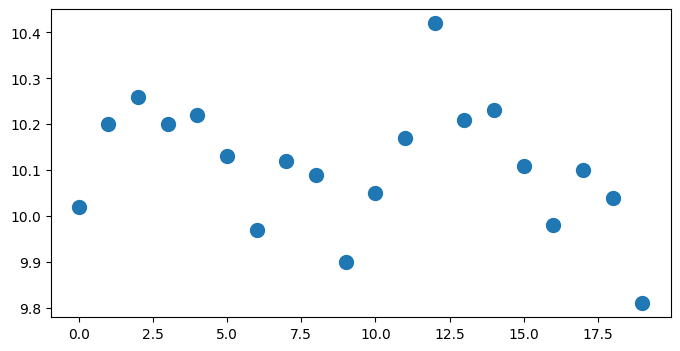

In [2]:
y = array([10.02, 10.20, 10.26, 10.20, 10.22, 10.13, 9.97, 10.12, 10.09, 9.90, \
     10.05, 10.17, 10.42, 10.21, 10.23, 10.11, 9.98, 10.10, 10.04, 9.81])

figure(figsize=(8,4))
plot(y,'o',markersize=10)
plot(y.mean()*ones(size(P)),'r--',lw=2)
plot(10*ones(size(y)),'k-',lw=2)
text(6.,y.mean()+.05,'Average',fontsize=14,color='r')
text(5.,10.01,'True',fontsize=14)
xlabel('trial')
ylabel(r'$P$ [kPa]') 

## Calculate the descriptive statistics 

1. Average: 

    $$\tilde{\mu} = \frac{1}{N}\sum\limits_{k=1}^{N} x_k$$

2. Standard deviation: 

    $$\tilde{\sigma} = \sqrt{\frac{1}{N-1}\sum\limits_{k=1}^{N} (x_k - \tilde{\mu})^2 }$$  

3. Root-mean-square, r.m.s. : 

    $$x_{\mathrm{rms}} = \sqrt{\frac{1}{N}\sum\limits_{k=1}^{N} (x_k - \tilde{\mu})^2 }$$  




In [ ]:
mu = y.mean()
sigma = y.std(ddof=1) # note the definition, remember to check if the equations are right
rms = sqrt(mean((y-mu)**2))
print('average = %6.3f (kPa)' % mu)
print('standard deviation = %6.3f (kPa)' % sigma)
print('r.m.s.= %6.3f (kPa)' % rms)

## Prepare the histogram


Choice of the bin size has been repeated until 0.05 kPa was found to work well.

In [ ]:
figure(figsize=(8,4))
# We prepare histogram with the $\Delta P = 0.05$ kPa
bins = arange(9.65,10.55,0.05)
n,bins = histogram(y,bins=bins) # 
# normalization: 
z = n/(np.sum(n)*0.05)

# bin centers for the plot
x = bins[:-1]+0.5*diff(bins)[0]




# Let's see if it fits normal distribution
from scipy.stats import norm
# if you didn't estimate the mu, sigma above
param = norm.fit(P) # param[0] = sample mean, param[1] = sample std.
# pdf_fitted = norm.pdf(x,loc=param[0],scale=param[1])

pdf_fitted = norm.pdf(x,loc=mu,scale=sigma)

bar(x,z,width=.045)
plot(x,pdf_fitted,'r-o',lw=3)
xlabel(r'$P$ [kPa]')
ylabel('Frequency')
legend(('expected','observed'))

## The normal, Gaussian distribution can be tested using higher order moments:

Skewness and kurtosis are like average (1st order) and standard deviation (2nd order), but for 3rd and 4th order statistics. 
One shows how symmetric the distribution is and another how flat (tall) it is. Gaussian distribution values are known, 
or can be quickly estimated taken some really random distribution. 

In [ ]:

import scipy.stats as st

print("skewness = %f, kurtosis = %f" % (st.skew(y), st.kurtosis(y)))
# let's compare it to the values of larger random values sample:
tmp = norm.rvs(loc=param[0],scale=param[1],size=100000)
print("Normal distribution skewness -> %f, kurtosis -> %f" % (st.skew(tmp), st.kurtosis(tmp)))

## Estimate the $\chi^2$ and test the hypothesis

1. First for every column in the histogram, compare the value of the column with the fitted distribution
2. Then count the number of columns (left zeros or right zeros are not counted), in our case it is 13

In [ ]:
chi_sq = sum((z - pdf_fitted)**2/(pdf_fitted))
print('chi_square = %6.4f' % chi_sq)

# degrees of freedom = number of non-zero bins - 3, count 13, zero between two values count.
print(f"n = {n}")
print(f" dof = {13 - 3}")
dof = 10

In [ ]:
from scipy.stats import chi2

# one-sided Chi^2 test
pval = 1 - chi2.cdf(chi_sq, dof)
print("Confidence level is: %3.1f percent" % (pval*100))

## Graphical test is also common

In [ ]:
Image(filename = "../../img/xsquare.png", width=300)